<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**인공신경망**을 구성하는 절차
* 1 - 더미데이터 준비
* 2 - 더미데이터를 훈련 / 검증 / 테스트 용으로 나눔
* 3 - 심층을 만듦(dense)
* 4 - 모델(model)에 적용
* 5 - compile 진행(최적화 기법 적용)
* 6 - fit(훈련)
* 7 - evaluate(검증)

###**손실곡선**
* fit() 메소드로 모델을 훈련하는 동안 훈련 과정이 상세하게 출력되어 확인할 수 있음.
    * 에포크 횟수, 손실, 정확도 등.
    * 실행 후 하단에 **`<keras.src.callbacks.history.History at 0x7d332f0c02b0>`** 출력 메시지가 나옴.
    * 코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 **실행 결과**를 자동으로 출력.
    * 즉, fit() 메소드는 History 라는 클래스 객체를 반환함.
        * History에는 훈련 과정의 지표, 손실, 정확도 등이 들어 있음.
    * 이 값을 잘 활용하면 그래프를 그릴 수 있음.

In [1]:
#실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듦.
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
#↑ 파이참이나 다른 곳 버전 오류 해결용

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

#케라스 API에서 패션 MNIST 데이터 셋을 불러옴.
#훈련세트와 테스트세트를 만듦.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

#이미지의 픽셀 값이 0 ~ 155 범위에서 0 ~ 1 사이로 변환.
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target =\
 train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_scaled.shape, train_target.shape)
print(test_input.shape, test_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(10000, 28, 28) (10000,)
(12000, 28, 28) (12000,)


In [4]:
#모델을 만드는 간단한 함수를 정의.(하나의 매개변수를 받아 리턴.)
def model_fn(a_layer=None):
    #심층 신경망 만듦.
    model = keras.Sequential()
    #입력층.(다차원 배열을 일차배열로. 28 x 28 배열을 입력으로 받아 1차원 배열로 변환.)
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    #은닉층.
    model.add(keras.layers.Dense(100, activation='relu'))

    #model_fn() 함수에 a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가.
    if a_layer:
        model.add(a_layer)
    #출력층. 다중분류 softmax 이용.
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
#위에서 만든 메소드 호출하여 model 변수에 담음.
model = model_fn()
#모델 요약 정보.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#loss='sparse_categorical_crossentropy' : 다중분류
#metrics=['accuracy']                   : 정확도

In [7]:
#fit() 메소드 결과를 history 변수에 담음.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

#훈련과정 출력 조절.(verbose)
#verbose=0  : 훈련과정을 나타내지 않음.
#verbose=1  : 기본값. 에포크마다 진행 막대와 함께 손실 등의 지표 출력.
#verbose=2  : 진행 막대 빼고 모두 출력.

In [8]:
print(history.history.keys())

#훈련 측정 값이 담겨있는 history 딕셔너리가 존재.
#정확도: accuracy / 손실: loss
#정확도는 compile() 메소드의 metrics 매개변수에 accuracy를 추가했기 때문에 history 속성에 포함되어 있음.

dict_keys(['accuracy', 'loss'])


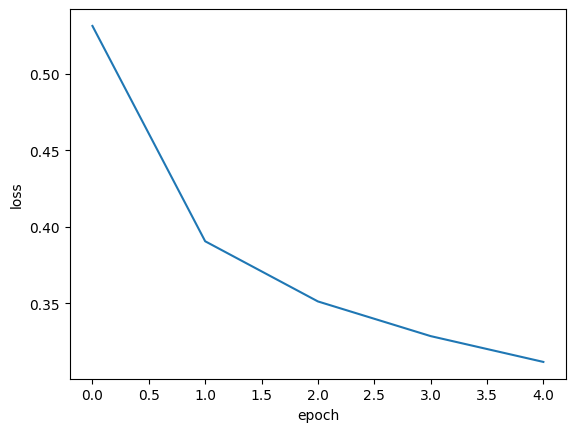

In [9]:
import matplotlib.pyplot as plt

#히스토리 속성에 포함된 손실과 정확도는
#에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로
#맷플롯립으로 쉽게 그래프 처리가 가능.
plt.plot(history.history['loss'])

#파이썬 인덱스는 0부터 시작. 5개의 에포크가 0~4까지 x축에 표현됨.
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

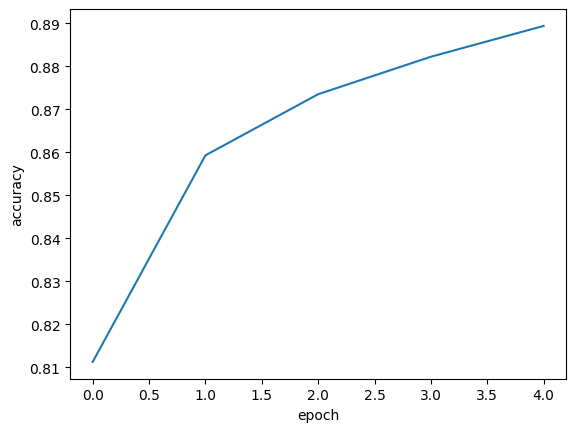

In [10]:
#이번에는 정확도를 출력.

plt.plot(history.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()
#결과 분석: 에포크마다 손실 감소, 정확도 향상.

In [11]:
#이번에는 에포크 횟수를 20번으로 늘려서 봐보자.

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

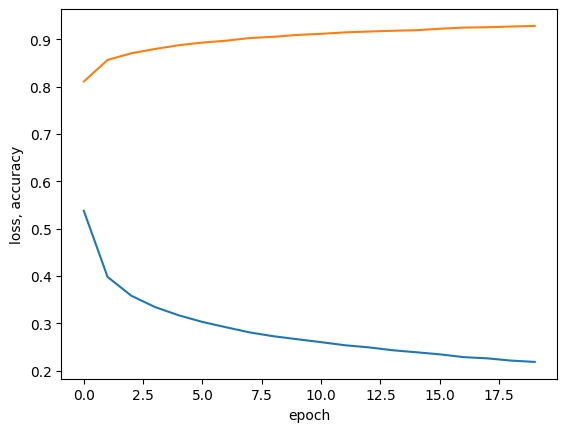

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

###**검증 손실**
* 예전에 확률적 경사 하강법을 사용했을 때, **과대/과소 적합과 에포크 사이에 관계** 부분이 있었다.
* **인공 신경망**은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨.
    * 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요함.
    * 위에서처럼 훈련세트와 손실만 그리면 과대/과소적합 파악이 어려움.
    * → **검증 손실**을 이용하여 과대/과소 적합을 응용하겠다.

<br/><br/>
###**keypoint**
* 손실을 사용하는 것과 정확도를 사용하는 것의 차이?
    * 인공신경망 모델이 최적화하는 대상은 정확도가 아닌 **손실 함수(손실률;loss rate)**.
    * 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데, 모델이 잘 훈련 되었는지 판단하려면 정확도보다는 **손실 함수의 값을 확인**하는 것이 더 좋은 방법.

In [13]:
#검증 손실
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7608 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9003 - loss: 0.2868 - 

In [14]:
print(history.history.keys())
#정확도 accuracy  손실 loss
#검증세트 정확도, 손실도 추가됨.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


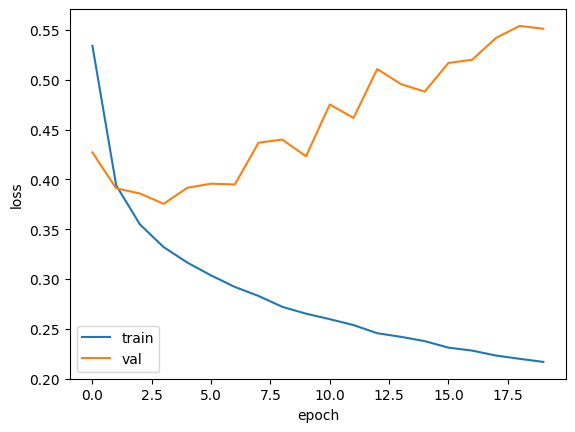

In [15]:
#과대/과소 적합 문제를 조사하기 위해 훈련손실, 검증 손실을 한 그래프에 그려서 비교해보자.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

#결과 분석
#초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승함.
#훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어짐.
#검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증 세트에 대한 정확도가 증가할 것 같다.
#과대적합을 막기 위한 방법으로 예전에 사용했던 규제 방식 대신 신경망에 특화된 규제 방법(드롭아웃)을 나중에 해보자.

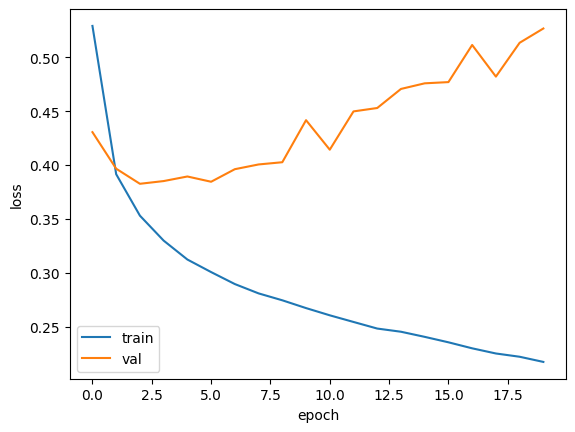

In [16]:
#지금은 옵티마이저 하이퍼 파라미터를 조절해 과대적합을 완화 시켜보겠다.
#RMSprop 옵티마이저는 많은 문제에서 잘 작동. 다른 방법으로 adam이 있음.

model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

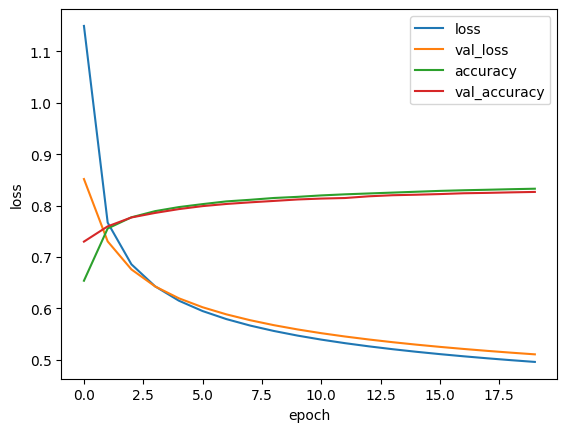

In [17]:
#Adagrad 기법으로 최적화 후 차트로 보자.

model = model_fn()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])

plt.show()

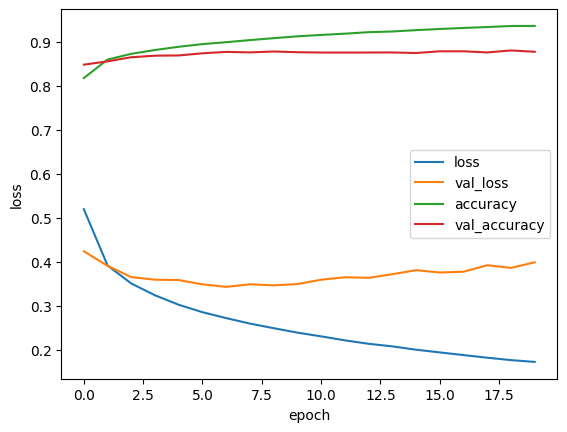

In [18]:
#adam 기법으로 최적화 후 차트로 보자.

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])

plt.show()

###**드롭아웃(Dropout)**
* 딥러닝의 기초가 되는 **제프리 힌턴**이 소개했다.
* 훈련과정에서 층에 있는 **일부 뉴런을 랜덤하게 꺼**서 (뉴런 출력을 0으로 만듦) **과대 적합을 막음**.
    * 어떤 샘플을 처리할 때 은닉층의 두 번째 뉴런이 드롭아웃되어 h2 출력이 없음.
    * 다른 샘플을 처리할 때는 은닉층의 첫 번째 뉴런이 드롭아웃되어 h1 출력이 없음.
* 뉴런은 **랜덤하게** 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 **우리가 하이퍼 파라미터에** 정할 것임.
* 드롭아웃이 왜 과대 적합을 막을 수 있을지 생각을 해보면
    * 이전 층의 일부 뉴런이 랜덤하게 꺼지면 **특정 뉴런에 과대하게 의존하는 것을 줄일** 수 있고, 모든 입력에 대해 주의를 기울여야 함.
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것.

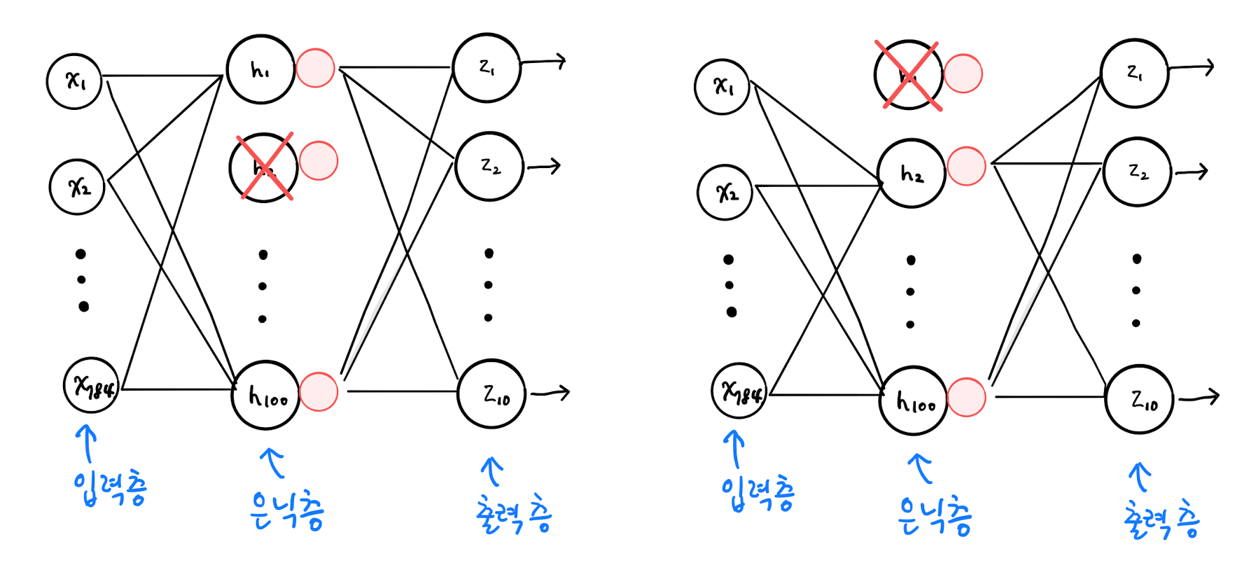

###**또 다른 분석**
* 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭아웃을 적용해 훈련하는 것은 마치 **2개의 신경망을 ◎앙상블하는 것 처럼 상상**하게 됨
* 케라스에서 드롭아웃을 keras.layers.Dropout로 제공함 (어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬)
* 드롭아웃이 **층처럼 사용**되지만 훈련되는 파라미터는 없음

<br/><br/>
###**◎앙상블**
* 더 좋은 예측을 만들기 위해 **여러 개의 모델을 훈련하는 머신러닝 알고리즘**, 과대 적합을 막아주는 좋은 기법

In [22]:
#model_fn 함수에 드롭아웃 객체를 전달하여 층 추가.
#30% 정도 드롭아웃.
model = model_fn(keras.layers.Dropout(0.3))

#요약 확인
model.summary()

#은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음.
#입력과 출력의 크기가 같음.
#일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

###**주의사항**
* 훈련이 끝난뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
* 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
* 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음


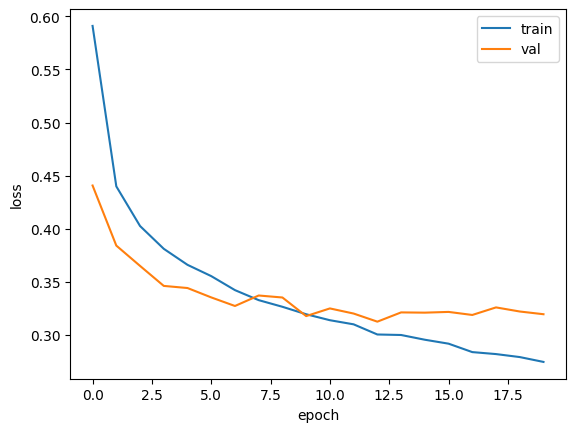

In [20]:
# 훈련 손실과 검증 손실의 그래프를 그려보자.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

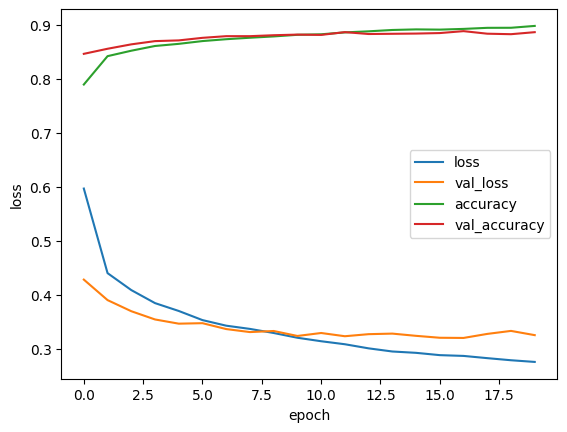

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

#과대적합이 확실히 줄어듦. 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음.
#20번의 에포크를 실행해 결국 과대 적합이 됨. → 10번만 해보자.

In [24]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

# 모델 저장
model.save('model-whole.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###**케라스 모델**
* 케라스 모델은 훈련된 모델의 파라미터를 저장하는 'save_weights()' 메소드가 있음.
* 텐서플로우의 체크 포인트 포멧으로 저장하지만, .h5일 경우 HDF5 포멧으로 저장.
    * 텐서플로우
        * 참고: ***https://www.tensorflow.org/guide/checkpoint?hl=ko***
    * HDF: 대용량 데이터를 저장하기 위한 파일 형식.
        * 참고: ***https://geunuk.tistory.com/466***

In [26]:
#HDF5 형식으로도 저장됨.
model.save_weights('model.weights.h5')

In [28]:
#저장한 모델을 불러와 테스트를 진행.
!ls -al model*

#!  : 리눅스
#ls : list를 가져와라

-rw-r--r-- 1 root root 971928 Jan 10 05:52 model.weights.h5
-rw-r--r-- 1 root root 974765 Jan 10 05:44 model-whole.keras


In [30]:
#실험1
#훈련하지 않은 새로운 모델을 만든 후 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용.

#훈련하지 않은 새로운 모델.
model = model_fn(keras.layers.Dropout(0.3))

#이전에 저장했던 모델 파라미터를 로딩.
model.load_weights('model.weights.h5')
#이때 사용하는 메소드는 save_weights()와 쌍을 이루는 load_weights() 메소드.
#주의사항: load_weights() 메소드를 사용하려면 save_weights() 메소드로 저장했던 모델과
#"정확히" 같은 구조를 가져야함.

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#모델의 검증 정확도를 확인하자.
import numpy as np

#predict() 메소드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환(다중분류)

#패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 수는 12,000개이므로
#predict() 메소드는 (12000,10) 크기의 배열을 반환.
#10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax)
#타겟 레이블과 비교하여 정확도를 계산해보자.
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

#axis=-1 배열의 마지막 차원을 따라 최댓값을 고름.
#검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨.
#예를 들어, 아래 그림처럼 5x3 배열에 axis=1로 한 값과 axis=0으로 한 값의 인덱스를 반환.

#argmax()로 고른 인덱스(val_labels)와 타겟(val_target)을 비교하여
#같으면 1이 되고, 다르면 0이 됨.
#이를 평균으로 출력해봄.(정확도)
print(np.mean(val_labels==val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.88075


* axis=1
    * 열을 따라 각 행의 최대값의 인덱스를 선택.
* axis=0
    * 행을 따라 각 열의 최대값의 인덱스를 선택.
* 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타겟(val_target)을 비교.
    * → 두 배열에서 각 위치의 값이 같으면 1, 다르면 0(평균하면 정확도가 됨.)

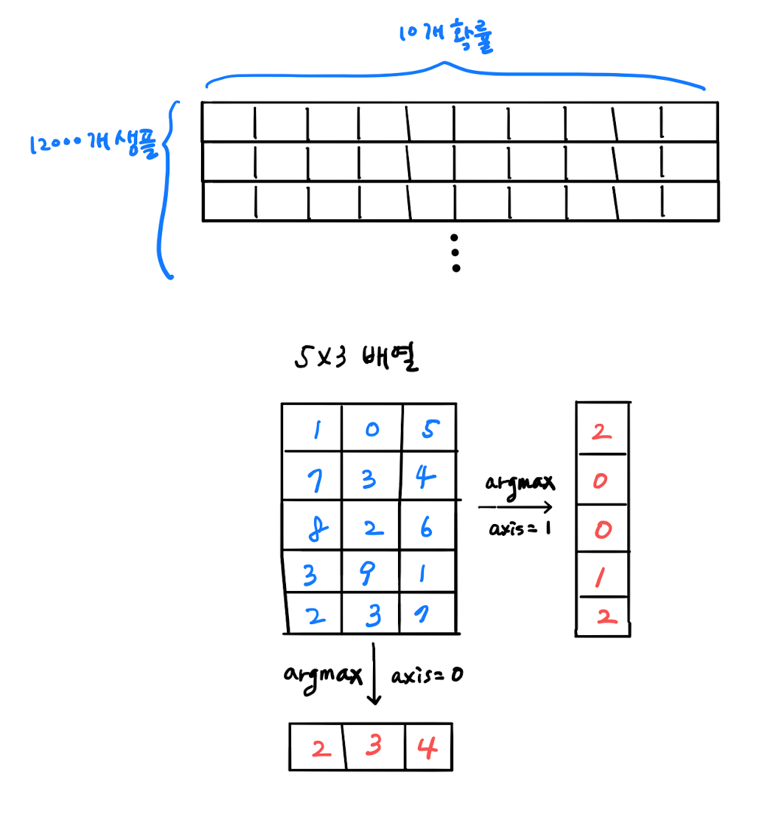

In [35]:
#모델 전체를 파일에서 읽은 후 검증 세트의 정확도를 출력.
#load_model() 저장된 케라스 파일 읽기
model = keras.models.load_model('model-whole.keras')

#같은 모델을 불러들였기 때문에 위와 정확도가 같음.
model.evaluate(val_scaled, val_target)

#현 상태 분석
#20번의 에포크 동안 모델을 훈련하여 검증 점수가 상능하는 지점을 확인.
#모델을 과대적합 되지 않은 에포크 만큼 다시 훈련함.
#모델을 두 번씩 훈련하지 않고 한 번에 끝내는 방법을 연구해보자.
#→ 케라스 콜백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.3263


[0.3285037875175476, 0.8807500004768372]

In [36]:
#실험2
#아예 파일로 새로운 모델을 만든 후, 바로 사용해보자.
#추가적으로 콜백(callback)이라는 것을 활용해보자.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#ModelCheckpoint() 콜백은 기본적으로 에포크마다 모델을 저장함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
#save_best_only=True 매개변수를 지정하여
#가장 낮은 검증 점수를 만드는 모델을 저장할 수 있음

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
#모델 훈련 후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



###**콜백**
* 훈련 과정 **중간에 어떤 작업을 수행**할 수 있도록 하는 객체.
    * └ keras.callback 패키지에 있음.
    * └ fit() 메소드의 callback 매개변수에 리스트로 전달하여 사용.
* 위에서 사용한 콜백은 ModelCheckpoint 콜백.
    * 에포크 마다 모델을 저장함.
* save_best_only=True 매개변수를 지정해 가장 낮은 검증 점수를 만드는 모델을 저장함.

In [37]:
#load_model로 저장했던 값을 불러와 다시 예측.
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)
#keras.callback.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장.
#여전히 20번의 에포크 동안 훈련함.
#사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이 커지므로
#훈련을 계속할 필요가 없어서 이때 훈련을 종료하면 자원과 시간을 아낄 수 있음.
#→ 조기종료(early stopping)
#조기종료를 안 하고 훈련하는 것은 "비용의 낭비"라고도 함.
#조기종료는 딥러닝 분야에서 많이 사용하는 기법.
#에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주는 역할도 함.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8860 - loss: 0.3223


[0.32203447818756104, 0.8854166865348816]

In [38]:
#케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함,
#이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정.
#patience=2 2번 연속 검증 점수가 향상되지 않으면 훈련 중지.
#restore_best_weigths=True → 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
#가장 낮은 검증 손실의 모델을 파일에 저장, 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

#훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
#에포크의 조기종료 시점.
print(early_stopping_cb.stopped_epoch)

9


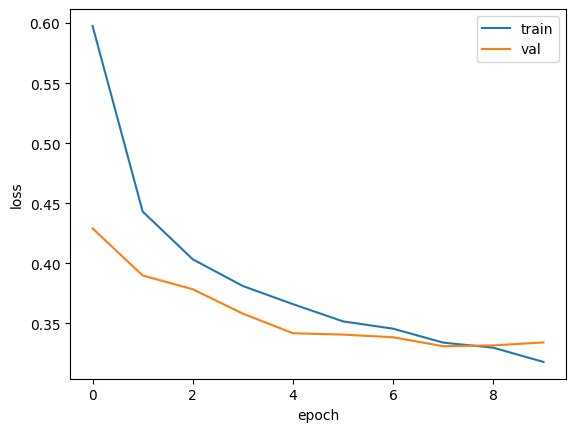

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

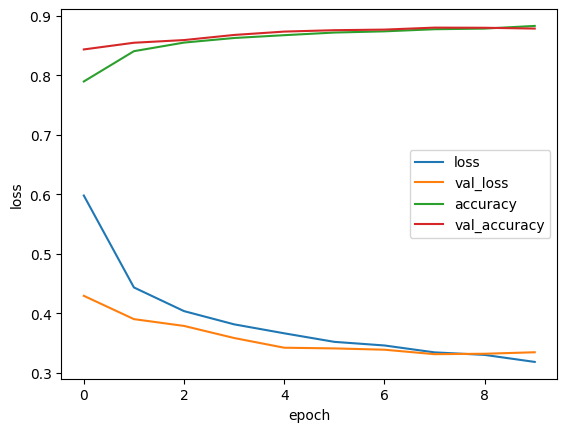

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()

In [44]:
#검증세트의 성능 확인.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8831 - loss: 0.3275


[0.331053763628006, 0.8799166679382324]